# Data Visualisation Segmentation Project
## Leaf Rot Recognition

#### Group: Biddiscombe, Gritti, Sedra

In [1]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt

# Image visualisation and manipulation
from PIL import Image
# import av
# import skimage


### Load the data
For leaf disease segmentation we have downloaded 2 datasets, one which contains a diverse range of images taken from the internet, of different sizes and different contents, and another larger one with regularly sized images that contain certain deiseases only. 
This second dataset is cleaner and more informative, with clearer masks and better labels, but is very heavy as the images are large (1200 by 2000 pixels).

To use the data more easily, we need a way to downsample the data. 
We created two functions to do this, which should allow for better model creationg and training later in the project.

### Dataset 1 - 588 diverse images
This dataset contains images of various plants, with some unspecified kinds of leaf diseases. 
The masks are mostly informative, but the data is too small due to the diversity of the images contained, so it is not ideal for training a model for segmentation. 
We intend to use this dataset as an external, additional testing set, if everything else goes well.

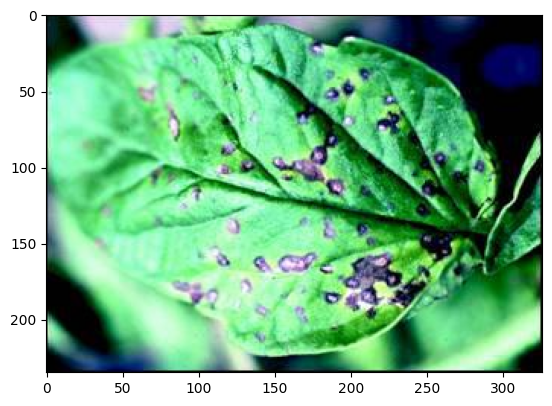

In [2]:
# Display an image to test correctness
path_to_588_images = "data_588_leafs/images/"
path_to_588_masks = "data_588_leafs/masks/"
image_0_path = path_to_588_images + "00000.jpg"
image_0 = Image.open(image_0_path)

plt.imshow(image_0)
plt.show()

In [3]:

# return array representing an image, downsampled by a rate
def downsample(im_path, ds_rate = 10):
    img = np.array(Image.open(im_path))
    if len(img.shape) == 3:
        return img[::ds_rate, ::ds_rate, :]
    return img[::ds_rate, ::ds_rate]

# return image downsampled enough to closely fit the wished for size  
def open_and_scale(im_path, reference_size = 250):
    img = np.array(Image.open(im_path))
    im_shape = img.shape
    ds_rate = im_shape[0] // reference_size
    return downsample(im_path, ds_rate= max(1, ds_rate))


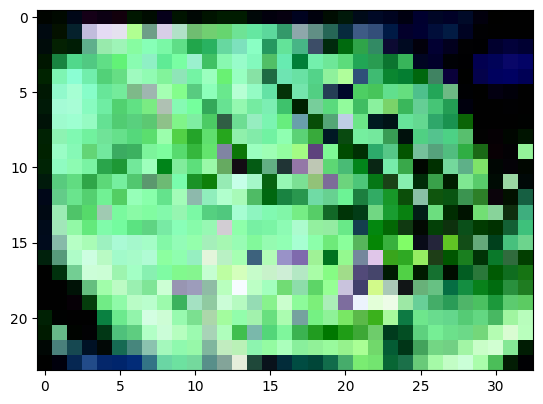

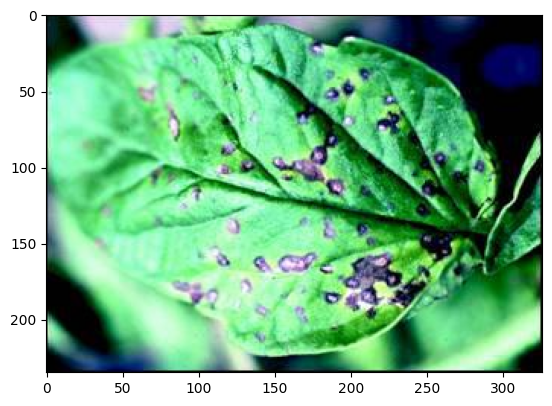

In [4]:
plt.imshow(downsample(image_0_path))
plt.show()

# note: do not use first function for dataset 1 images

plt.imshow(open_and_scale(image_0_path))
plt.show()

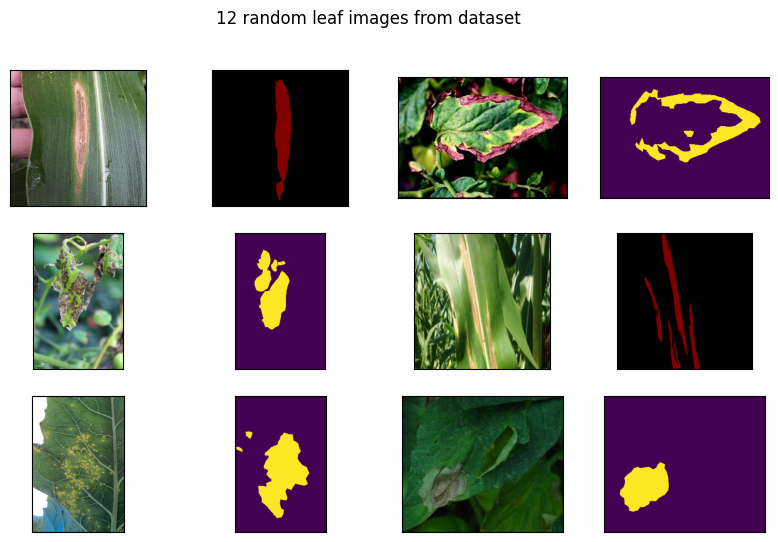

In [5]:
nr_imgs = 588

random_selection = []

plt.figure(figsize=(10,6))

i = 0

while len(random_selection) < 6:
    rand_nr = np.random.randint(nr_imgs)
    if rand_nr in random_selection:
        continue
    
    i += 1
    random_selection.append(rand_nr)
    plt.subplot(3,4,i)
    img = open_and_scale(path_to_588_images + f"{rand_nr:05d}.jpg")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

    i += 1
    plt.subplot(3,4,i)
    img = open_and_scale(path_to_588_masks + f"{rand_nr:05d}.png")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

plt.suptitle("12 random leaf images from dataset")
plt.show()

In [6]:
def plot_random_selection(im_number=588, nr_to_plot=6, 
                          ims_path="data/data/images/", 
                          masks_path="data/data/masks/", 
                          img_name="",
                          mask_name=""):
    
    x_plots = int(round(np.sqrt(nr_to_plot) + 0.4))
    y_plots = int(round(nr_to_plot / x_plots + 0.4))

    plt.figure(figsize=(10,4))
    random_selection = []
    i = 0

    while len(random_selection) < nr_to_plot:
        rand_nr = np.random.randint(im_number)
        if rand_nr in random_selection:
            continue
        
        random_selection.append(rand_nr)
        
        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = open_and_scale(ims_path + f"{img_name}{rand_nr:05d}.jpg")
        plt.imshow(img)
        # plt.title(f"leaf {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])

        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = open_and_scale(masks_path + f"{mask_name}{rand_nr:05d}.png")
        plt.imshow(img)        
        # plt.title(f"mask {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f"{nr_to_plot} random images from dataset, with masks")
    # plt.tight_layout()
    plt.show()


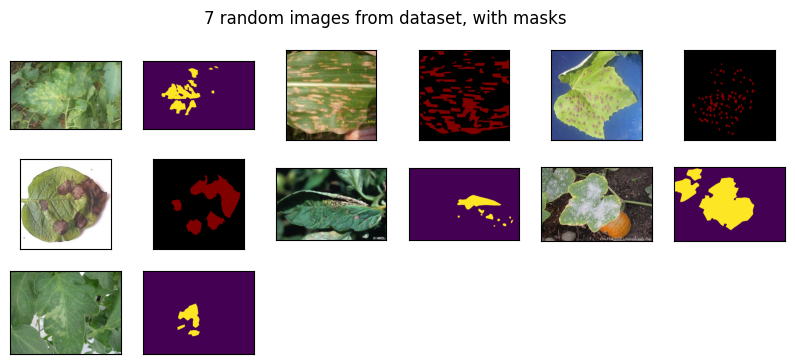

In [7]:
plot_random_selection(ims_path = path_to_588_images, masks_path=path_to_588_masks, im_number=588, nr_to_plot=7)

### Dataset 2 - Apple dataset
The second dataset contains more samples, which are not only regular in size (1200 x 2000 px), but are also clearly labelled and separated by disease type.
All leaves represent apple leaves, but are separated into categories: 
- "health" for healthy leaves with no associated masks; 
- "scab" for apple leaves affected by the scabs disease, a fungal infection that leaves brown sometimes oval shaped spots covering the leaves; 
- "rust" for leaves affected by the rust plant disease, another fungal infection that leaves yellowins spots on the affected area.

Images from this dataset are far too large and need to be downscaled for use (when training the data without downscaling we could only use 100 images at a time, due to the high memory cost, 4GB of cache just for the image list).

In [8]:
# trying to use it on new data
path_to_apple_imgs_scab = "data_1291_leafs/img_scab/"
path_to_apple_masks_scab = "data_1291_leafs/masks_machine_scab/"

path_to_apple_imgs_rust = "data_1291_leafs/img_rust/"
path_to_apple_masks_rust = "data_1291_leafs/masks_machine_rust/"

path_to_apple_imgs_both = "data_1291_leafs/img_both/"
path_to_apple_masks_both = "data_1291_leafs/masks_machine_both/"

path_to_apple_imgs_health = "data_1291_leafs/img_health/"
# there are no masks for health, would be a np.zeros_like(im_health_array)

img_name_system = "Train_" # Train_0.jpg, Train_1820.jpg
mask_name_system = "Train_" # Train_0.png, Train_1820.png
# Note: NOT ALL INDEXES HAVE ASSOCIATED IMAGES


In [9]:
# create a plotting function to visualise random leaves
def plot_random_scab(im_number=1820, nr_to_plot=6, 
                     ims_path=path_to_apple_imgs_scab, 
                     masks_path=path_to_apple_masks_scab, 
                     img_name="",
                     mask_name=""):
    
    x_plots = int(round(np.sqrt(nr_to_plot) + 0.4))
    y_plots = int(round(nr_to_plot / x_plots + 0.4))

    plt.figure(figsize=(10,4))
    random_selection = []
    i = 0

    while len(random_selection) < nr_to_plot:
        rand_nr = np.random.randint(im_number)
        if rand_nr in random_selection:
            continue
        
        try:
            img = open_and_scale(ims_path + f"{img_name}{rand_nr}.jpg")
        except: 
            continue

        random_selection.append(rand_nr)
        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        plt.imshow(img)
        # plt.title(f"leaf {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])

        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        img = open_and_scale(masks_path + f"{mask_name}{rand_nr}.png")
        plt.imshow(img)        
        # plt.title(f"mask {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f"{nr_to_plot} random images from dataset, with masks")
    # plt.tight_layout()
    plt.show()


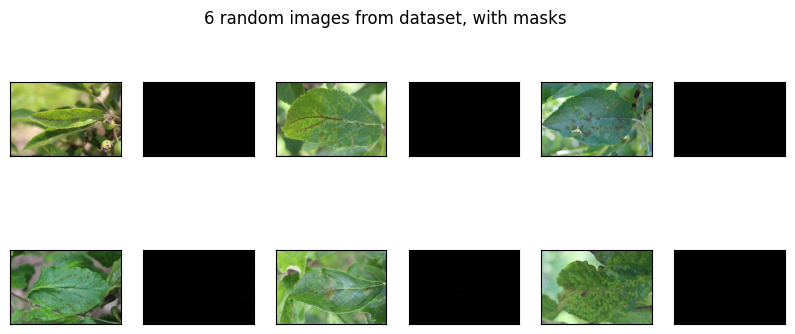

In [10]:
plot_random_scab(img_name=img_name_system, mask_name=mask_name_system)

### Mask visibility
The masks looks like totally black images, but the images that represent the masks do contain some information about the masks, it is simply stored in the wrong way.
The masks are stored as images, with 3 colour channels and expected values of integers between 0 and 255, but the actual information is invisible as the largest number in the mask colour channel data is "2".

We create a function to transform the masks and make them visible.

(273, 410, 3)
(273, 410)
368


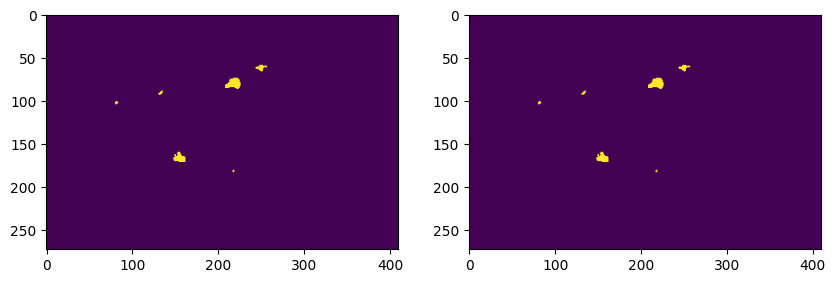

In [11]:
# trying different dataset
img = open_and_scale(path_to_apple_masks_scab + mask_name_system + "0.png")
# plt.imshow(img)

print(img.shape)

gray_img = np.mean(img, axis=2) # converting to grayscale by averaging the 3 channels
print(gray_img.shape)

mask = gray_img > 0
print(len(img[mask]))

# plotting the average mask value (over the 3 colour inputs) against the absolute truth value
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray_img)
plt.subplot(1,2,2)
plt.imshow(mask)
plt.show()

# There is not much difference between the average and the truth value

In [12]:
# Create functions to more easily view the masks.
def transform_mask(mask):
    mask = np.array(mask)
    mask[:,:,1:3] = 0 # make it red
    mask = mask > 0
    return mask * 255 # outputs red mask, only colour input 0 (first one, volour red) has any values

# plt.imshow(transform_mask(path_to_masks + mask_name_system + "0.png"))

def transform_binary_mask(mask):
    mask = np.array(mask)
    mask = np.sum(mask, axis=2)
    mask = mask > 0
    return mask # outputs binary values of mask

In [13]:
def plot_random_leaf_mask(type="scab", 
                          nr_to_plot=6, im_number=1820, 
                          img_name=img_name_system,
                          mask_name=mask_name_system):
    if type == "scab":
        ims_path = path_to_apple_imgs_scab
        masks_path = path_to_apple_masks_scab
    elif type == "rust":
        ims_path = path_to_apple_imgs_rust
        masks_path = path_to_apple_masks_rust
    elif type == "both":
        ims_path = path_to_apple_imgs_both
        masks_path = path_to_apple_masks_both
    else:
        print("This type does not work.")
        return

    x_plots = int(round(np.sqrt(nr_to_plot) + 0.4))
    y_plots = int(round(nr_to_plot / x_plots + 0.4))

    plt.figure(figsize=(10,4))
    random_selection = []
    i = 0

    while len(random_selection) < nr_to_plot:
        rand_nr = np.random.randint(im_number)
        if rand_nr in random_selection:
            continue
        
        try:
            img = open_and_scale(ims_path + f"{img_name}{rand_nr}.jpg")
        except: 
            continue

        random_selection.append(rand_nr)
        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        plt.imshow(img)
        # plt.title(f"leaf {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])

        i += 1
        plt.subplot(y_plots, x_plots * 2, i)
        mask = open_and_scale(masks_path + f"{mask_name}{rand_nr}.png")
        mask = transform_mask(mask)
        plt.imshow(mask, cmap="gray")        
        # plt.title(f"mask {int(round(i/2))}")
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f"{nr_to_plot} random {type if type != "both" else "diseased"} images, with masks")
    # plt.tight_layout()
    plt.show()


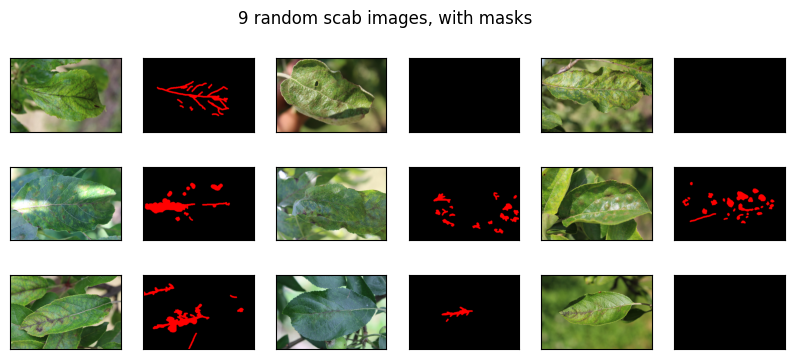

In [14]:
plot_random_leaf_mask(nr_to_plot=9, type="scab")

In [15]:
def plot_leaf_and_mask_in_axs(img_name, path_to_leaf, path_to_mask, axs):
    try:
        img = open_and_scale(path_to_leaf)
    except:
        print(f"Error loading leaf image {img_name}")
        return
    leaf = open_and_scale(path_to_leaf)
    mask = open_and_scale(path_to_mask)
    red_mask = transform_mask(mask)
    leaf_array = np.array(leaf)
    red_mask_array = np.array(red_mask)
    overlay = np.clip(leaf_array + red_mask_array, 0, 255)

    # Plot the images (leaf, mask, leaf with mask)
    axs[0].imshow(leaf)
    axs[1].imshow(red_mask)
    axs[2].imshow(overlay)
    # Add the titles
    axs[0].set_title(f"Leaf {img_name}")
    axs[1].set_title("Disease mask")
    axs[2].set_title(f"Disease on leaf {img_name}")
    
    for ax in axs:
        ax.axis("off")


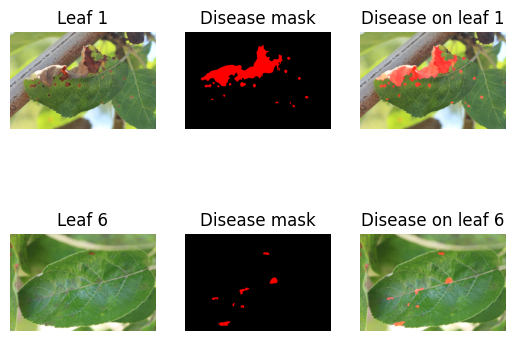

In [16]:
f, (axs1, axs2) = plt.subplots(nrows=2,ncols=3)

# test
plot_leaf_and_mask_in_axs("1", path_to_apple_imgs_both + img_name_system + "1.jpg", path_to_apple_masks_both + mask_name_system + "1.png", axs1)
plot_leaf_and_mask_in_axs("6", path_to_apple_imgs_both + img_name_system + "6.jpg", path_to_apple_masks_both + mask_name_system + "6.png", axs2)


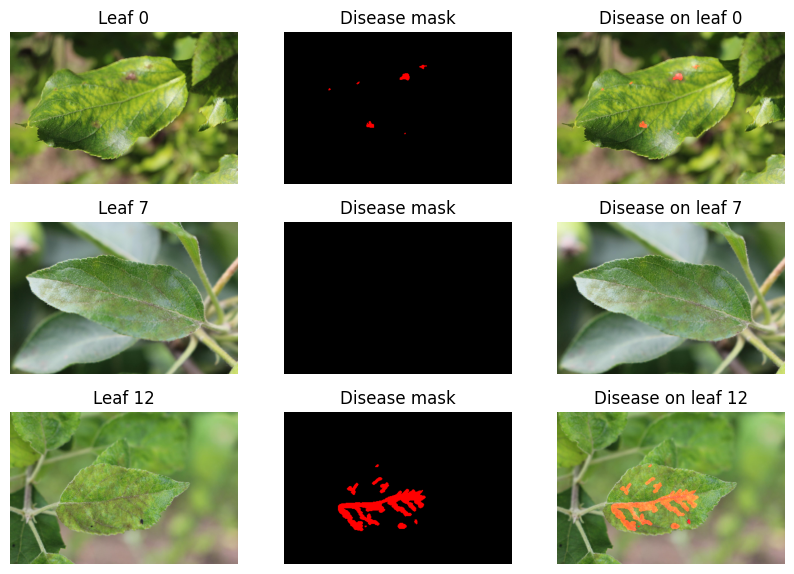

In [17]:
f, (axs1, axs2, axs3) = plt.subplots(nrows=3, ncols=3)
f.set_figwidth(10)
f.set_figheight(7)


# test
plot_leaf_and_mask_in_axs("0", path_to_apple_imgs_scab + img_name_system + "0.jpg", path_to_apple_masks_scab + mask_name_system + "0.png", axs1)
plot_leaf_and_mask_in_axs("7", path_to_apple_imgs_scab + img_name_system + "7.jpg", path_to_apple_masks_scab + mask_name_system + "7.png", axs2)
plot_leaf_and_mask_in_axs("12", path_to_apple_imgs_scab + img_name_system + "12.jpg", path_to_apple_masks_scab + mask_name_system + "12.png", axs3)


### Dataset quality note
We notice that some images, even if they have an associated mask file, may not have any information relating to the disease.
Because of this it is necessary to only take into account the images with informative masks for the later model training, and therefore we need to clean up the set of data that will be used in the rest of teh notebook.
We create functions to check the contents of the masks and store them if they contain information.

We will store the apple leaf dataset and the 588 random leaves separately.

In [19]:
# def check_image_of_1291_dataset(path_to_images, img_name_system):
#     existing_images = []
#     for i in range(3000):
#         try:  
#             img = Image.open(path_to_images + img_name_system + f"{i}.jpg")
#             img = open_and_scale_array(np.array(img))
#             existing_images.append(img)
#         except:
#             continue

#     print(f"Found {len(existing_images)}")
#     return existing_images

# def check_masks_of_1291_dataset(path_to_masks, mask_name_system):
#     existing_masks = []
#     for i in range(3000):
#         try:
#             img = Image.open(path_to_masks + mask_name_system + f"{i}.png")
#             img = open_and_scale_array(np.array(img))
#             # img = transform_binary_mask(img)
#             existing_masks.append(img) # make the masks binary
#         except:
#             continue

#     print(f"Found {len(existing_masks)}")
#     return existing_masks

# def check_image_of_588_dataset(path_to_images):
#     existing_images = []
#     for i in range(588):
#         try:
#             img = Image.open(path_to_images + img_name_system + f"{i:05d}.jpg")
#             img = open_and_scale_array(np.array(img))
#             existing_images.append(img)
#         except:
#             continue

#     print(f"Found {len(existing_images)}")
#     return existing_images

# def check_masks_of_588_dataset(path_to_masks):
#     existing_masks = []
#     for i in range(588):
#         try:
#             img = Image.open(path_to_masks + mask_name_system + f"{i:05d}.png")
#             img = open_and_scale_array(np.array(img))
#             # img = transform_binary_mask(img) # make the masks binary
#             existing_masks.append(img)
#         except:
#             continue

#     print(f"Found {len(existing_masks)}")
#     return existing_masks


In [ ]:
def get_existing_image_indexes(path_to_images, img_name_system):
    existing_indexes = []
    for i in range(3000):
        try:  
            Image.open(path_to_images + img_name_system + f"{i}.jpg")
            existing_indexes.append(i)
        except:
            continue

    print(f"Found {len(existing_indexes)}")
    return existing_indexes

def get_existing_mask_indexes(path_to_masks, mask_name_system):
    existing_indexes = []
    for i in range(3000):
        try:
            Image.open(path_to_masks + mask_name_system + f"{i}.png")
            existing_indexes.append(i) # make the masks binary
        except:
            continue

    print(f"Found {len(existing_indexes)}")
    return existing_indexes


In [22]:
path_to_images_general_disease = "data_588_leafs/images/"
path_to_masks_general_disease = "data_588_leafs/masks/"


print("Images with scab from apple dataset:")
imgs_scab_idxs = get_existing_image_indexes(path_to_apple_imgs_scab, img_name_system)
print("Masks with scab from apple dataset:")
masks_scab_idxs = get_existing_mask_indexes(path_to_apple_masks_scab, mask_name_system)
print()
print("Images with rust from apple dataset:")
imgs_rust_idxs = get_existing_image_indexes(path_to_apple_imgs_rust, img_name_system)
print("Masks with rust from apple dataset:")
masks_rust_idxs = get_existing_mask_indexes(path_to_apple_masks_rust, mask_name_system)
print()
print("Images with both diseases from apple dataset:")
imgs_both_idxs = get_existing_image_indexes(path_to_apple_imgs_both, img_name_system)
print("Masks with both diseases from apple dataset:")
masks_both_idxs = get_existing_mask_indexes(path_to_apple_masks_both, mask_name_system)
print()
print("Total apple images:")
imgs_all_idxs = imgs_scab_idxs + imgs_rust_idxs + imgs_both_idxs
print(len(imgs_all_idxs))
print("Total apple masks:")
masks_all_idxs = masks_scab_idxs + masks_rust_idxs + masks_both_idxs
print(len(masks_all_idxs))

print()
print("Check all indexes are the same:")
if imgs_scab_idxs == masks_scab_idxs: print("Scab indexes line up.")
else: print("Scab indexes do not line up!")
if imgs_rust_idxs == masks_rust_idxs: print("Rust indexes line up.")
else: print("Rust indexes do not line up!")
if imgs_both_idxs == masks_both_idxs: print("Both disease indexes line up.")
else: print("Both disease indexes do not line up!")


Images with scab from apple dataset:
Found 592
Masks with scab from apple dataset:
Found 592

Images with rust from apple dataset:
Found 622
Masks with rust from apple dataset:
Found 622

Images with both diseases from apple dataset:
Found 91
Masks with both diseases from apple dataset:
Found 91

Total apple images:
1305
Total apple masks:
1305

Check all indexes are the same:
Scab indexes line up.
Rust indexes line up.
Both disease indexes line up.


In [ ]:
# we don't actually need to check all the images and masks, 
# we know all images are available so we only need to check the masks.
# Check for non-empty masks:

def get_non_empty_mask_indexes(path_to_masks, mask_name_system):
    existing_indexes = []
    for i in range(3000):
        try:
            mask = open_and_scale(path_to_masks + mask_name_system + f"{i}.png")
            if np.sum(mask) == 0:
                continue
            existing_indexes.append(i) 
        except:
            continue

    print(f"Found {len(existing_indexes)}")
    return existing_indexes

def get_non_empty_mask_indexes_588(path_to_masks):
    existing_indexes = []
    for i in range(588):
        try:
            mask = open_and_scale(path_to_masks  + f"{i:05d}.png")
            if np.sum(mask) == 0:
                continue
            existing_indexes.append(i)
        except:
            continue

    print(f"Found {len(existing_indexes)}")
    return existing_indexes

In [ ]:
print("Non-empty scab masks:")
scab_idxs = get_non_empty_mask_indexes(path_to_apple_masks_scab, mask_name_system)
print("Non-empty rust masks:")
rust_idxs = get_non_empty_mask_indexes(path_to_apple_masks_rust, mask_name_system)
print("Non-empty masks with both rust and scab:")
both_idxs = get_non_empty_mask_indexes(path_to_apple_masks_both, mask_name_system)

print()
print("Total non-empty masks:")
print(len(scab_idxs) + len(rust_idxs) + len(both_idxs))

print()
print("Non-empty masks from 588 dataset:")
idxs_588 = get_non_empty_mask_indexes_588(path_to_588_masks)
# we should only use these index lists from now on

Non-empty scab masks:
Found 384
Non-empty rust masks:
Found 399
Non-empty masks with both rust and scab:
Found 90

Total non-empty masks:
873


In [78]:
# make path setting easier
def make_path(type: str, mask: bool, idx: int):
    if type == "scab":
        if mask: base_path, extension = path_to_apple_masks_scab, ".png"
        else: base_path, extension = path_to_apple_imgs_scab, ".jpg"
    elif type == "rust":
        if mask: base_path, extension = path_to_apple_masks_rust, ".png"
        else: base_path, extension = path_to_apple_imgs_rust, ".jpg"
    elif type == "both":
        if mask: base_path, extension = path_to_apple_masks_both, ".png"
        else: base_path, extension = path_to_apple_imgs_both, ".jpg"
    else:
        print("This type does not work.")
        return
    
    return base_path + img_name_system + str(idx) + extension


def make_588_path(mask: bool, idx: int):
    if mask:
        return path_to_588_masks + f"{idx:05d}" + ".png"
    return path_to_588_images + f"{idx:05d}" + ".jpg"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..510].


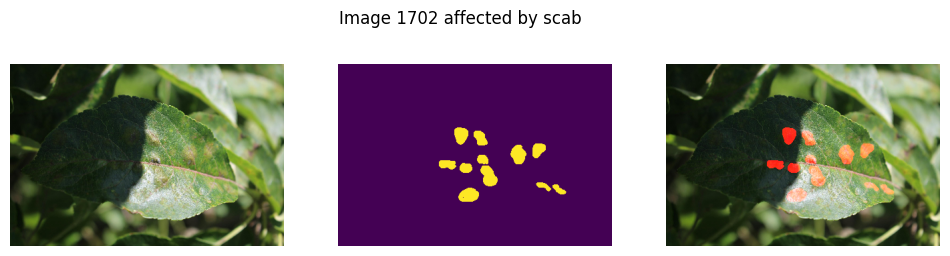

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6..480].


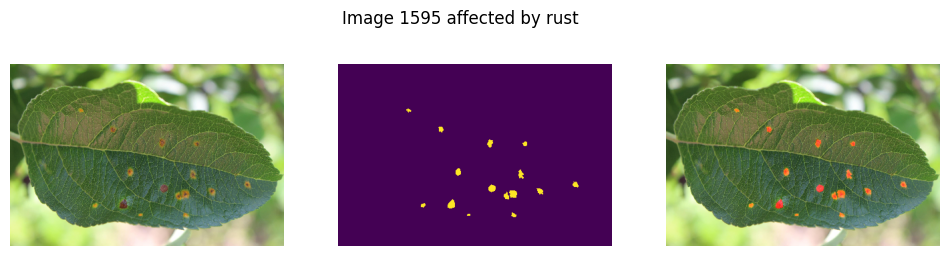

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [8..496].


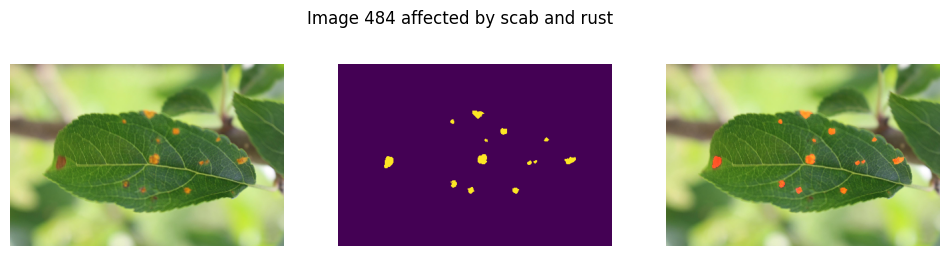

In [26]:
# example images from each type:

# Scab
plt.figure(figsize=(12,3))
idx = np.random.choice(scab_idxs)
img_path = make_path(type="scab", mask=False, idx=idx)
mask_path = make_path(type="scab", mask=True, idx=idx)
plt.subplot(1,3,1)
plt.imshow(open_and_scale(img_path))
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(transform_binary_mask(open_and_scale(mask_path)))
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(open_and_scale(img_path) + transform_mask(open_and_scale(mask_path)))
plt.axis("off")
plt.suptitle(f"Image {idx} affected by scab")
plt.show()

# Rust
plt.figure(figsize=(12,3))
idx = np.random.choice(rust_idxs)
img_path = make_path(type="rust", mask=False, idx=idx)
mask_path = make_path(type="rust", mask=True, idx=idx)
plt.subplot(1,3,1)
plt.imshow(open_and_scale(img_path))
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(transform_binary_mask(open_and_scale(mask_path)))
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(open_and_scale(img_path) + transform_mask(open_and_scale(mask_path)))
plt.axis("off")
plt.suptitle(f"Image {idx} affected by rust")
plt.show()

# Both
plt.figure(figsize=(12,3))
idx = np.random.choice(both_idxs)
img_path = make_path(type="both", mask=False, idx=idx)
mask_path = make_path(type="both", mask=True, idx=idx)
plt.subplot(1,3,1)
plt.imshow(open_and_scale(img_path))
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(transform_binary_mask(open_and_scale(mask_path)))
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(open_and_scale(img_path) + transform_mask(open_and_scale(mask_path)))
plt.axis("off")
plt.suptitle(f"Image {idx} affected by scab and rust")
plt.show()



(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

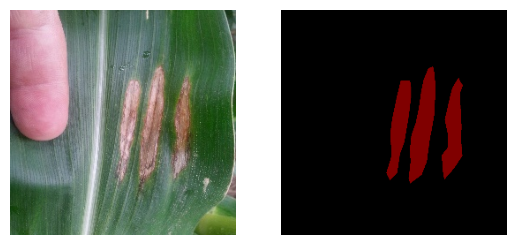

In [84]:
plt.subplot(1,2,1)
idx=np.random.randint(588)
im = open_and_scale(make_588_path(mask=False, idx=idx))
mask = (open_and_scale(make_588_path(mask=True, idx=idx)))

plt.imshow(im)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask)
plt.axis("off")


## Note - dataset agglomeration
Instead of using all the data, we select only the best data to use, out of the apple leaves dataset. 
To make sure we obtain an informative model, we only select images for which a mask containing information exists. 
Some images were incorrectly masked, and for this reason we need to select only the masks with information available.

We intend in the future to test the classification obtained with this data on the less organised pictures in the 588 leaf dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..479].


Image shape: (273, 410, 3)
Mask shape: (273, 410)


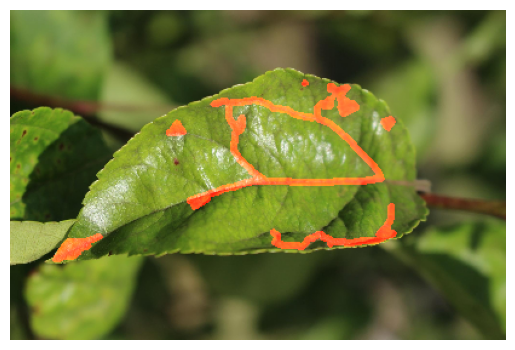

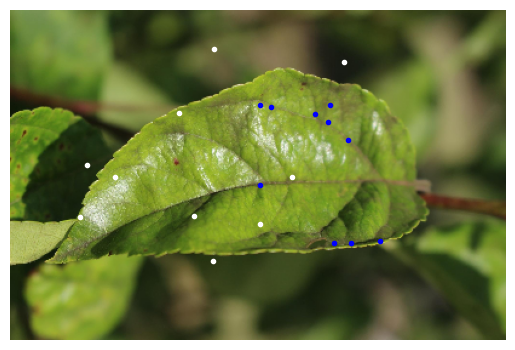

In [ ]:
# extract 33 x 33 patches from disease patch
# multiple times
# 3 T, 3 F
# check icorsi code

# using professor's code

def pick_random_centers(mask, size=32, ignore=0):
    mask_ignored = mask.copy()
    mask_ignored[:ignore,:]=False
    mask_ignored[-ignore:,:]=False
    mask_ignored[:,:ignore]=False
    mask_ignored[:,-ignore:]=False
    rs, cs = np.where(mask_ignored)
    ix = np.random.randint(len(rs), size=size)
    return rs[ix], cs[ix]

patches = []
labels = []

idx = np.random.choice(scab_idxs)
img_path = make_path(type="scab", mask=False, idx=idx)
mask_path = make_path(type="scab", mask=True, idx=idx)

img = open_and_scale(img_path)
mask = transform_binary_mask(open_and_scale(mask_path))

print("Image shape:", img.shape)
print("Mask shape:", mask.shape)

plt.imshow(img + transform_mask(open_and_scale(mask_path)))
plt.axis("off")
plt.show()

plt.imshow(img)
plt.axis("off")
rs,cs = pick_random_centers(mask, size=10, ignore=32)
plt.plot(cs, rs, 'b.')
for r,c in zip(rs,cs):
    patches.append(img[r-8:r+8, c-8:c+8, :])
    labels.append(mask[r,c])

rs,cs = pick_random_centers(~mask, size=10, ignore=32)
plt.plot(cs, rs, 'w.')
for r,c in zip(rs,cs):
    patches.append(img[r-8:r+8, c-8:c+8, :])
    labels.append(mask[r,c])


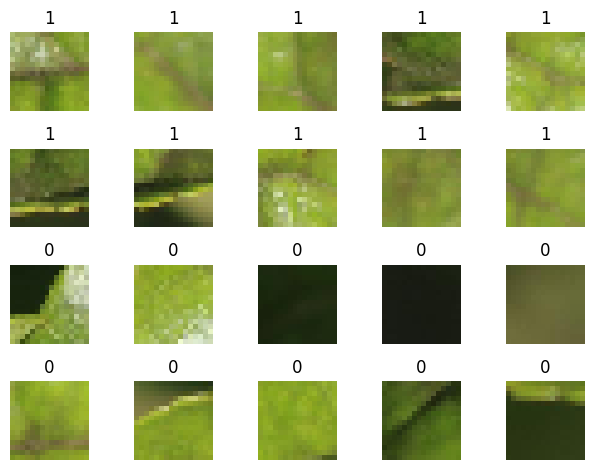

In [32]:
# display 33x33 areas around center pixel
for i in range(len(patches)):

    plt.subplot(4, 5, i+1)
    plt.title(labels[i] * 1)
    # plt.title("Disease patch" if labels[i] else "Leaf patch")
    plt.imshow(patches[i])
    plt.axis("off")


plt.tight_layout()
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2..437].


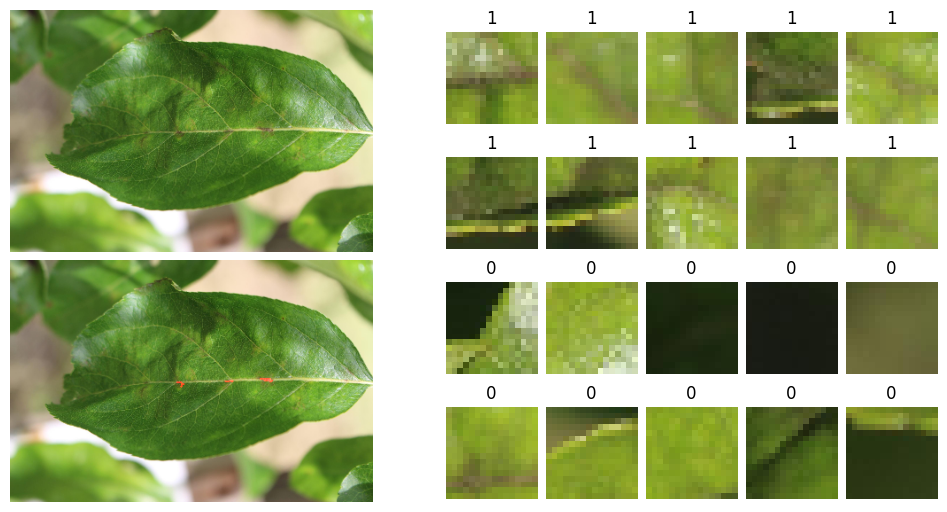

In [33]:
fig = plt.figure(layout="constrained", figsize=(10,5))

gs0 = fig.add_gridspec(1, 2)

gs1 = gs0[0].subgridspec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

# images_scab[50]
idx = np.random.choice(scab_idxs)
img_path = make_path(type="scab", mask=False, idx=idx)
mask_path = make_path(type="scab", mask=True, idx=idx)
ax1.imshow(open_and_scale(img_path))
ax1.axis("off")
ax2.imshow(open_and_scale(img_path) + transform_mask(open_and_scale(mask_path)))
ax2.axis("off")

gs2 = gs0[1].subgridspec(4, 5)
i = 0
for ss in gs2:
    ax = fig.add_subplot(ss)
    ax.imshow(patches[i])
    ax.set_title(labels[i] * 1)
    ax.axis("off")
    i += 1



In [34]:
def show_leaf_and_patches(img_path, 
                          mask_path, 
                          patch_radius=8,
                          n_patches=8):
    img = open_and_scale(img_path)
    mask = transform_mask(open_and_scale(mask_path))
    binary_mask = transform_binary_mask(open_and_scale(mask_path))

    fig = plt.figure(layout="constrained", figsize=(10,5))
    gs0 = fig.add_gridspec(1, 2)
    gs1 = gs0[0].subgridspec(2, 1)
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    ax1.imshow(img + mask)
    ax1.set_title("Leaf with mask")
    ax1.axis("off")
    ax2.imshow(img)
    ax2.set_title("Selected patches")
    ax2.axis("off")

    patches = []
    labels = []

    rs,cs = pick_random_centers(binary_mask, size=n_patches, ignore=32)
    plt.plot(cs, rs, 'b.')
    for r,c in zip(rs,cs):
        patches.append(img[r-patch_radius:r+patch_radius, c-patch_radius:c+patch_radius, :])
        labels.append(binary_mask[r,c])

    rs,cs = pick_random_centers(~binary_mask, size=n_patches, ignore=32)
    ax2.plot(cs, rs, 'w.')
    for r,c in zip(rs,cs):
        patches.append(img[r-patch_radius:r+patch_radius, c-patch_radius:c+patch_radius, :])
        labels.append(binary_mask[r,c])

    gs2 = gs0[1].subgridspec(4, 4)
    i = 0
    for ss in gs2:
        ax = fig.add_subplot(ss)
        ax.imshow(patches[i])
        ax.set_title(labels[i] * 1)
        ax.axis("off")
        i += 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7..501].


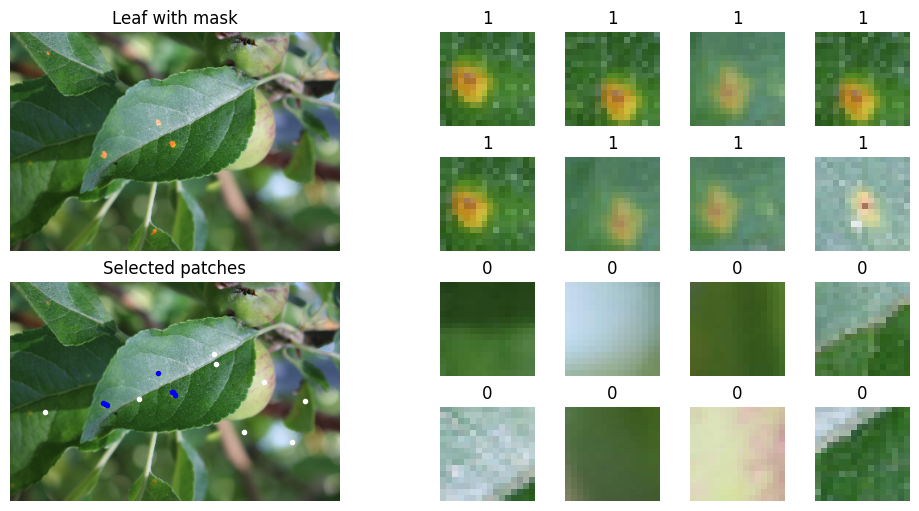

In [35]:
idx = np.random.choice(rust_idxs)
img_path = make_path(type="rust", mask=False, idx=idx)
mask_path = make_path(type="rust", mask=True, idx=idx)
show_leaf_and_patches(img_path, mask_path)



In [36]:
# create list of paths to use for display etc
scab_img_paths = [make_path(type="scab", mask=False, idx=i) for i in scab_idxs]
scab_mask_paths = [make_path(type="scab", mask=True, idx=i) for i in scab_idxs]

rust_img_paths = [make_path(type="rust", mask=False, idx=i) for i in rust_idxs]
rust_mask_paths = [make_path(type="rust", mask=True, idx=i) for i in rust_idxs]

both_img_paths = [make_path(type="both", mask=False, idx=i) for i in both_idxs]
both_mask_paths = [make_path(type="both", mask=True, idx=i) for i in both_idxs]

all_img_paths = scab_img_paths + rust_img_paths + both_img_paths
all_mask_paths = scab_mask_paths + rust_mask_paths + both_mask_paths

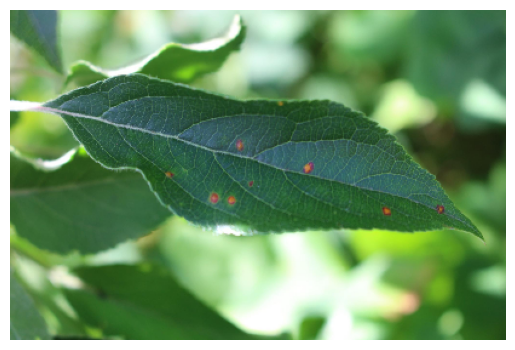

In [37]:
# test if the paths work
plt.imshow(open_and_scale(np.random.choice(all_img_paths)))
plt.axis("off")
plt.show()

## Splitting train and test sets

In [ ]:
# This code already exists above

# def pick_random_centers(mask, size=32, ignore=0):
#     mask_ignored = mask.copy()
#     mask_ignored[:ignore,:]=False
#     mask_ignored[-ignore:,:]=False
#     mask_ignored[:,:ignore]=False
#     mask_ignored[:,-ignore:]=False
#     rs, cs = np.where(mask_ignored)
#     if len(rs) == 0:
#         return rs, cs
#     ix = np.random.randint(len(rs), size=size)
#     return rs[ix], cs[ix]

In [58]:
def create_dataset_from_images_and_masks(image_paths, mask_paths, patch_radius=8, n_patches=20):
    patches = []
    labels = []

    for i in range(len(image_paths)):
        im = open_and_scale(image_paths[i])
        mask = transform_binary_mask(open_and_scale(mask_paths[i]))
        rs, cs = pick_random_centers(mask, size=n_patches//2, ignore=32)

        for r, c in zip(rs, cs):
            patches.append(im[r-patch_radius:r+patch_radius, c-patch_radius:c+patch_radius, :])
            labels.append(mask[r, c])

        rs, cs = pick_random_centers(~mask, size=n_patches//2, ignore=32)

        for r, c in zip(rs, cs):
            patches.append(im[r-patch_radius:r+patch_radius, c-patch_radius:c+patch_radius, :])
            labels.append(mask[r, c])

    return np.array(patches), np.array(labels)


In [59]:

# n_images = 100
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_img_paths, all_mask_paths, test_size=0.2, random_state=42)


In [61]:
print(f"Total paths: {len(all_img_paths)}")
print(f"Paths in train set: {len(X_train)}")
print(f"Paths in test set: {len(X_test)}")
print(f"Sum: {len(X_train) + len(X_test)}")
print()

# test that the paths are in the training set
for i in range(2):
    print(X_train[i])
    print(y_train[i])

print()

for i in range(2):
    print(X_test[i])
    print(y_test[i])

Total paths: 873
Paths in train set: 698
Paths in test set: 175
Sum: 873

data_1291_leafs/img_rust/Train_1126.jpg
data_1291_leafs/masks_machine_rust/Train_1126.png
data_1291_leafs/img_rust/Train_108.jpg
data_1291_leafs/masks_machine_rust/Train_108.png

data_1291_leafs/img_both/Train_180.jpg
data_1291_leafs/masks_machine_both/Train_180.png
data_1291_leafs/img_scab/Train_1622.jpg
data_1291_leafs/masks_machine_scab/Train_1622.png


In [63]:
patches_train, labels_train = create_dataset_from_images_and_masks(X_train, y_train, n_patches=20)
patches_test, labels_test = create_dataset_from_images_and_masks(X_test, y_test, n_patches=20)


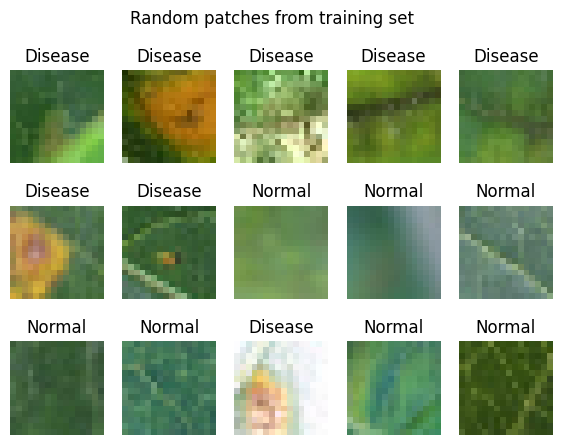

In [76]:
# show some of the training data
plt.figure(figsize=(7,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    idx = np.random.randint(len(labels_train))
    plt.imshow(patches_train[idx])
    plt.title("Disease" if labels_train[idx] else "Normal")
    plt.axis("off")
plt.suptitle("Random patches from training set")
plt.show()


In [ ]:
size = 0
for i in patches_train:
    size += im.nbytes
    
print(size / 1024 / 1024) # 2GB


2617.5


In [87]:
patches_train = patches_train.astype('float32') / 255.0
patches_test = patches_test.astype('float32') / 255.0
patches_train.shape, labels_train.shape, patches_test.shape, labels_test.shape

((13960, 16, 16, 3), (13960,), (3490, 16, 16, 3), (3490,))

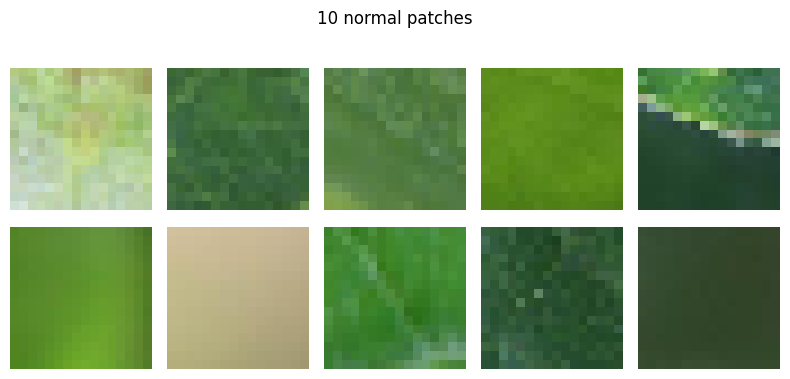

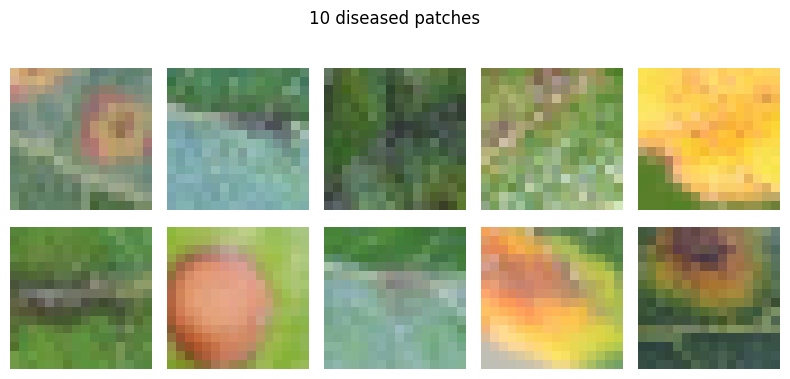

In [91]:
# visualise a set of patches

diseased_patches_train = patches_train[labels_train]
normal_patches_train = patches_train[~labels_train]

# visualise 10 normal patches

n_to_display = 10

plt.figure(figsize=(8,4))

for i in range(n_to_display):
    plt.subplot(2,5,i + 1)
    rnd_idx = np.random.randint(len(normal_patches_train))
    plt.imshow(normal_patches_train[rnd_idx])
    plt.axis("off")
    # plt.title("Diseased" if labels_train[rnd_idx] else "Normal")

plt.suptitle("10 normal patches")
plt.tight_layout()
plt.show()

# visualise 10 disease patches

n_to_display = 10

plt.figure(figsize=(8,4))

for i in range(n_to_display):
    plt.subplot(2,5,i + 1)
    rnd_idx = np.random.randint(len(diseased_patches_train))
    plt.imshow(diseased_patches_train[rnd_idx])
    plt.axis("off")
    # plt.title("Diseased" if labels_train[rnd_idx] else "Normal")

plt.suptitle("10 diseased patches")
plt.tight_layout()
plt.show()


# Training a simple model

2025-12-05 15:31:21.262621: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-05 15:31:21.268957: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-05 15:31:21.537601: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-05 15:31:23.088525: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Epoch 1/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7453 - loss: 0.4937 - val_accuracy: 0.7799 - val_loss: 0.4473
Epoch 2/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8223 - loss: 0.3879 - val_accuracy: 0.8352 - val_loss: 0.3691
Epoch 3/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8537 - loss: 0.3476 - val_accuracy: 0.8476 - val_loss: 0.3567
Epoch 4/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8633 - loss: 0.3256 - val_accuracy: 0.8630 - val_loss: 0.3168
Epoch 5/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8734 - loss: 0.3020 - val_accuracy: 0.8734 - val_loss: 0.3068
Epoch 6/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8816 - loss: 0.2873 - val_accuracy: 0.8802 - val_loss: 0.2961
Epoch 7/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8822 - loss: 0.2818 - val_accuracy: 0.8725 - val_loss: 0.2963
Epoch 8/50
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8867 - loss: 0.2734 - val_accuracy: 0.

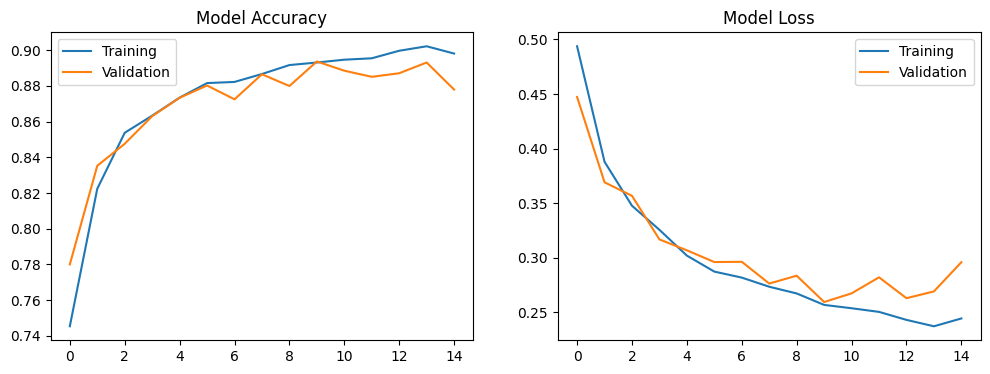

In [ ]:

def train_simple_model(patches_train, labels_train, patches_test, labels_test):
    from keras.callbacks import EarlyStopping
    from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
    from keras.models import Sequential
    early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
    model = Sequential([
        Conv2D(16, (5, 5), activation='relu', input_shape=patches_train[0].shape),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid') # binary classification 
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(patches_train, labels_train,epochs=30,batch_size=32,validation_data=(patches_test, labels_test),callbacks=[early_stopping])
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.legend()
    plt.show()

    return model

simple_model = train_simple_model(patches_train, labels_train, patches_test, labels_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


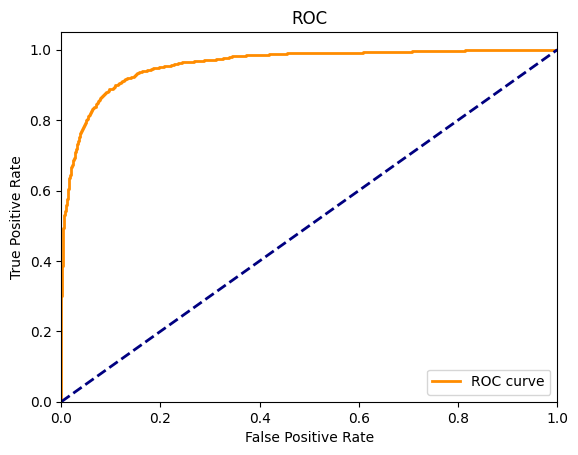

AUC: 0.959112315270936
F1 Score: 0.8716692189892803
Accuracy: 0.8799426934097421
Average predicted probability for positive class: 0.8281025
Average predicted probability for negative class: 0.14135936


In [93]:

from importlib import simple


def evaluate_model_performance(model, patches_test, labels_test):
    from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score
    y_pred_prob = model.predict(patches_test).ravel()
    fpr, tpr, thresholds = roc_curve(labels_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    y_pred = (y_pred_prob > 0.65).astype(int)
    accuracy = accuracy_score(labels_test, y_pred)
    print("AUC:", roc_auc)
    print("F1 Score:", f1_score(labels_test, y_pred))
    print("Accuracy:", accuracy)
    print("Average predicted probability for positive class:", np.mean(y_pred_prob[labels_test == 1]))
    print("Average predicted probability for negative class:", np.mean(y_pred_prob[labels_test == 0]))

evaluate_model_performance(simple_model, patches_test, labels_test)

# Training a complex model

In [94]:
# the following is from professor's code
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=patches_train[0].shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) # from the professor code this was 10, but we have binary classification hence 1
model.add(Activation('sigmoid')) # there was a 

model.compile(optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

model.fit(patches_train, labels_train, epochs=100, batch_size=32,
          validation_data=(patches_test, labels_test), callbacks=[early_stopping])


Epoch 1/100


/home/abiddisco/Documents/SUPSI/5th_sem/Computer Vision/programming/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


437/437 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7621 - loss: 0.4703 - val_accuracy: 0.8570 - val_loss: 0.3395
Epoch 2/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8578 - loss: 0.3328 - val_accuracy: 0.8430 - val_loss: 0.3648
Epoch 3/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8711 - loss: 0.3057 - val_accuracy: 0.8716 - val_loss: 0.3010
Epoch 4/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8839 - loss: 0.2807 - val_accuracy: 0.8722 - val_loss: 0.3104
Epoch 5/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8865 - loss: 0.2796 - val_accuracy: 0.8920 - val_loss: 0.2648
Epoch 6/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8909 - loss: 0.2643 - val_accuracy: 0.8903 - val_loss: 0.2671
Epoch 7/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8958 - loss: 0.2531 - val_accuracy: 0.8957 - val_loss: 0.2577
Epoch 8/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8994 - loss: 0.2464 - val_accuracy

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


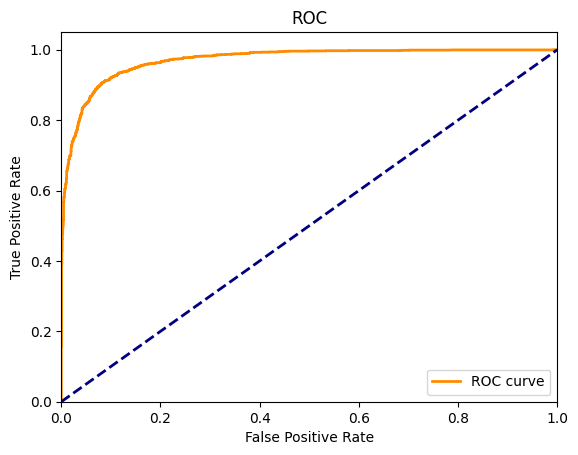

AUC: 0.9700669950738917
F1 Score: 0.8943089430894309
Accuracy: 0.8994269340974212
Average predicted probability for positive class: 0.8549461
Average predicted probability for negative class: 0.13053848


In [95]:
evaluate_model_performance(model, patches_test, labels_test)
